In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv')

In [4]:
df

,mpg,cylinders,displacement,acceleration,model,origin
0,18.0,8,307.0,12.0,70,1
1,15.0,8,350.0,11.5,70,1
2,18.0,8,318.0,11.0,70,1
3,16.0,8,304.0,12.0,70,1
4,17.0,8,302.0,10.5,70,1
...,...,...,...,...,...,...
401,27.0,4,140.0,15.6,82,1
402,44.0,4,97.0,24.6,82,2
403,32.0,4,135.0,11.6,82,1
404,28.0,4,120.0,18.6,82,1


In [5]:
df1 = df[df.isna().any(axis=1)]#printing rows with missing values.
df1

,mpg,cylinders,displacement,acceleration,model,origin
10,NaN,4,133.0,17.5,70,2
11,NaN,8,350.0,11.5,70,1
12,NaN,8,351.0,11.0,70,1
13,NaN,8,383.0,10.5,70,1
14,NaN,8,360.0,11.0,70,1
17,NaN,8,302.0,8.0,70,1
39,NaN,4,97.0,20.0,71,2
367,NaN,4,121.0,15.4,81,2


In [6]:
df1.shape #8 missing values

(8, 6)

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)
df_filled

array([[ 18. ,   8. , 307. ,  12. ,  70. ,   1. ],
       [ 15. ,   8. , 350. ,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. ,  11. ,  70. ,   1. ],
       ...,
       [ 32. ,   4. , 135. ,  11.6,  82. ,   1. ],
       [ 28. ,   4. , 120. ,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. ,  19.4,  82. ,   1. ]])

In [8]:
df_new=pd.DataFrame(df_filled,columns=['mpg', 'cylinders', 'displacement', 'acceleration', 'model', 'origin'])
df_new

,mpg,cylinders,displacement,acceleration,model,origin
0,18.0,8.0,307.0,12.0,70.0,1.0
1,15.0,8.0,350.0,11.5,70.0,1.0
2,18.0,8.0,318.0,11.0,70.0,1.0
3,16.0,8.0,304.0,12.0,70.0,1.0
4,17.0,8.0,302.0,10.5,70.0,1.0
...,...,...,...,...,...,...
401,27.0,4.0,140.0,15.6,82.0,1.0
402,44.0,4.0,97.0,24.6,82.0,2.0
403,32.0,4.0,135.0,11.6,82.0,1.0
404,28.0,4.0,120.0,18.6,82.0,1.0


In [9]:
df1 = df_new[df_new.isna().any(axis=1)]#printing rows with missing values.
df1 #no missing values after knn imputation 

,mpg,cylinders,displacement,acceleration,model,origin


## ASSIGNMENT PART

The mpg dadaset contains the target mpg, and the following features:
cylinders
displacement
acceleration
model: the model year
origin: where the vehicles were manufactured
Plot the scatter plot matrix and correlation matrix, pick two predictor variables for linear regression.

### scatterplot matrix

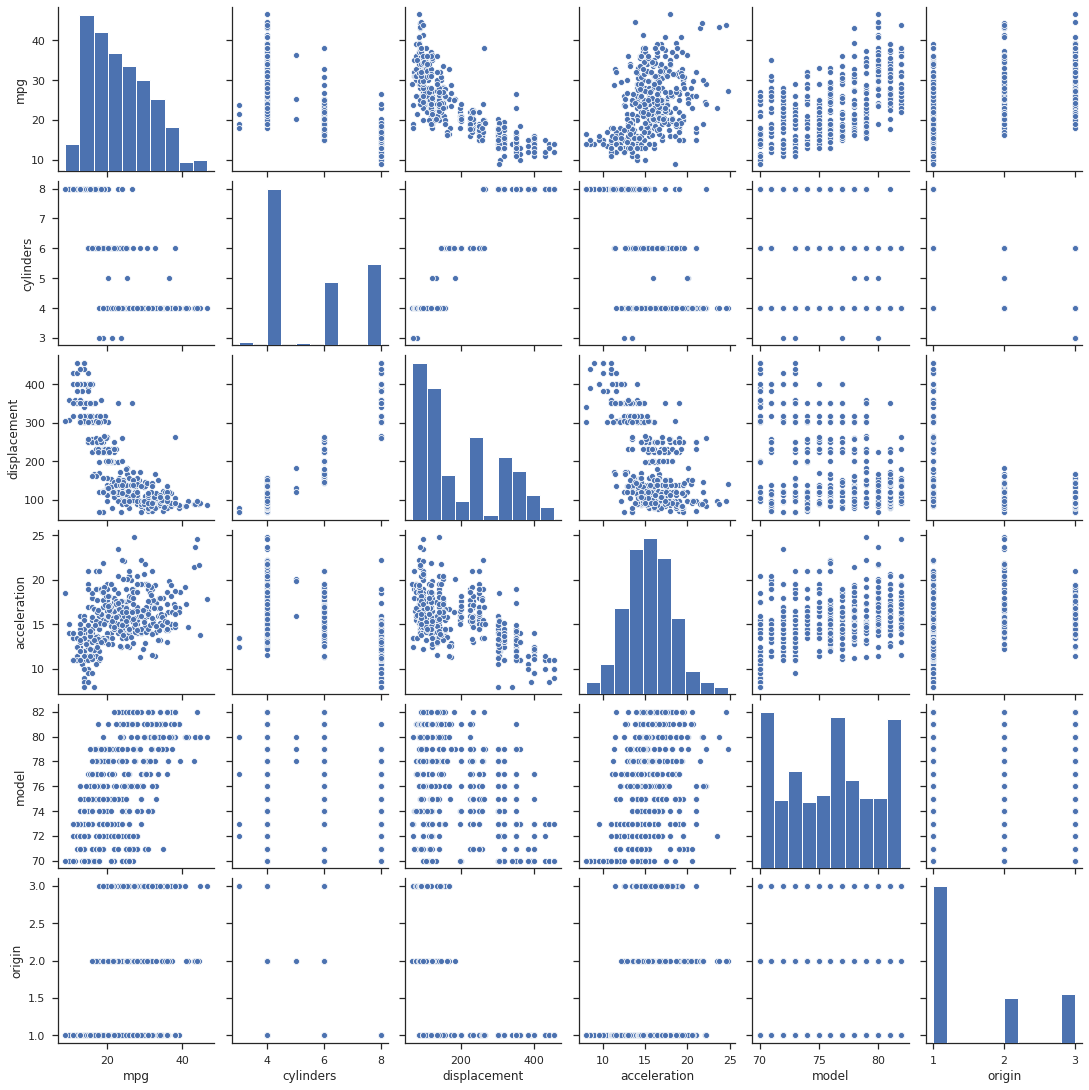

In [10]:
import seaborn as sns
sns.set(style="ticks")

df_new
sns.pairplot(df_new)

## correlation matrix

In [11]:
corrMatrix = df_new.corr()
print (corrMatrix)

                   mpg  cylinders  displacement  acceleration     model  \
mpg           1.000000  -0.778836     -0.807093      0.431643  0.586801   
cylinders    -0.778836   1.000000      0.951787     -0.522452 -0.360762   
displacement -0.807093   0.951787      1.000000     -0.557984 -0.381714   
acceleration  0.431643  -0.522452     -0.557984      1.000000  0.301992   
model         0.586801  -0.360762     -0.381714      0.301992  1.000000   
origin        0.567027  -0.567478     -0.613056      0.218845  0.187656   

                origin  
mpg           0.567027  
cylinders    -0.567478  
displacement -0.613056  
acceleration  0.218845  
model         0.187656  
origin        1.000000  


In [12]:
#two predictor variables for linear regression.
#1)model (mpg-model-->correlation=0.58)
#2)origin (mpg-origin-->correlation=0.56)

### Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. In simple terms, it tells us how much does one variable changes for a slight change in another variable. It may take positive, negative and zero values depending on the direction of the change. A high correlation value between a dependent variable and an independent variable indicates that the independent variable is of very high significance in determining the output. In a multiple regression setup where there are many factors, it is imperative to find the correlation between the dependent and all the independent variables to build a more viable model with higher accuracy. One must always remember that more number of features does not imply better accuracy. More features may lead to a decline in the accuracy if they contain any irrelevant features creating unrequired noise in our model.

### Note: A high correlation between dependent and independent variables is desired whereas the high correlation between 2 independent variables is undesired.


Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the  R2  and MSE in both the training and test set, plot the residual. 
What does the residual plot tell you?

In [13]:
df_new

,mpg,cylinders,displacement,acceleration,model,origin
0,18.0,8.0,307.0,12.0,70.0,1.0
1,15.0,8.0,350.0,11.5,70.0,1.0
2,18.0,8.0,318.0,11.0,70.0,1.0
3,16.0,8.0,304.0,12.0,70.0,1.0
4,17.0,8.0,302.0,10.5,70.0,1.0
...,...,...,...,...,...,...
401,27.0,4.0,140.0,15.6,82.0,1.0
402,44.0,4.0,97.0,24.6,82.0,2.0
403,32.0,4.0,135.0,11.6,82.0,1.0
404,28.0,4.0,120.0,18.6,82.0,1.0


In [14]:
df2=df_new
df2=df2.drop(['cylinders','displacement','acceleration'], axis = 1) 
df2

,mpg,model,origin
0,18.0,70.0,1.0
1,15.0,70.0,1.0
2,18.0,70.0,1.0
3,16.0,70.0,1.0
4,17.0,70.0,1.0
...,...,...,...
401,27.0,82.0,1.0
402,44.0,82.0,2.0
403,32.0,82.0,1.0
404,28.0,82.0,1.0


In [15]:
x= df2.iloc[:, 1:3].values
y= df2.iloc[:, 0].values
x

array([[70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  2.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  3.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  3.],
       [70.,  2.],
       [70.,  2.],
       [70.,  2.],
       [70.,  2.],
       [70.,  2.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [70.,  1.],
       [71.,  3.],
       [71.,  1.],
       [71.,  3.],
       [71.,  1.],
       [71.,  2.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,  1.],
       [71.,

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
xtrain, xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [17]:
ytest

array([26. , 25.4, 32.8,  9. , 16. , 19. , 15. , 15.5, 26.6, 32. , 15. ,
       16.5, 27.9, 21.5, 18. , 19.8, 23. , 28.4, 23. , 15. , 29.5, 32.3,
       32.9, 25. , 11. , 24.3, 13. , 16.5, 22.4, 29. , 38. , 21. , 24.5,
       24.5, 16. , 14. , 11. , 23. , 17. , 38.1, 24. , 15. , 20.6, 27.2,
       21.6, 29. , 20.5, 36.1, 23. , 22. , 25. , 22. , 22. , 26.6, 18.5,
       28. , 12. , 17. , 13. , 36. , 28. , 33. , 13. , 20.2, 17.5, 14. ,
       16.5, 28. , 13. , 29.9, 26.8, 16. , 21. , 18. , 16.9, 22. , 10. ,
       17.5, 13. , 34. , 28. , 16. ])

In [18]:
xtest

array([[71.,  1.],
       [79.,  2.],
       [78.,  3.],
       [70.,  1.],
       [75.,  1.],
       [75.,  1.],
       [75.,  1.],
       [77.,  1.],
       [81.,  1.],
       [74.,  3.],
       [72.,  1.],
       [76.,  1.],
       [80.,  1.],
       [77.,  2.],
       [73.,  1.],
       [79.,  1.],
       [75.,  1.],
       [79.,  1.],
       [75.,  1.],
       [77.,  1.],
       [78.,  3.],
       [81.,  3.],
       [81.,  3.],
       [75.,  2.],
       [73.,  1.],
       [80.,  1.],
       [76.,  1.],
       [76.,  2.],
       [81.,  1.],
       [74.,  2.],
       [82.,  1.],
       [72.,  1.],
       [76.,  1.],
       [77.,  1.],
       [76.,  1.],
       [71.,  1.],
       [73.,  1.],
       [71.,  1.],
       [79.,  1.],
       [80.,  3.],
       [70.,  2.],
       [73.,  1.],
       [78.,  1.],
       [81.,  1.],
       [78.,  2.],
       [76.,  2.],
       [78.,  1.],
       [78.,  1.],
       [75.,  2.],
       [77.,  3.],
       [76.,  2.],
       [70.,  1.],
       [72.,

In [19]:
from sklearn import linear_model
reg=linear_model.LinearRegression()#creating an object for linear regression
reg.fit(xtrain,ytrain)#training the model with available datapoints

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = reg.predict(xtest)
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))
# predicted vs actual

[[15.73063472 26.        ]
 [28.92154828 25.4       ]
 [32.49602546 32.8       ]
 [14.66214179  9.        ]
 [20.00460644 16.        ]
 [20.00460644 19.        ]
 [20.00460644 15.        ]
 [22.1415923  15.5       ]
 [26.41556402 26.6       ]
 [28.22205374 32.        ]
 [16.79912765 15.        ]
 [21.07309937 16.5       ]
 [25.34707109 27.9       ]
 [26.78456242 21.5       ]
 [17.86762058 18.        ]
 [24.27857816 19.8       ]
 [20.00460644 23.        ]
 [24.27857816 28.4       ]
 [20.00460644 23.        ]
 [22.1415923  15.        ]
 [32.49602546 29.5       ]
 [35.70150425 32.3       ]
 [35.70150425 32.9       ]
 [24.64757656 25.        ]
 [17.86762058 11.        ]
 [25.34707109 24.3       ]
 [21.07309937 13.        ]
 [25.71606949 16.5       ]
 [26.41556402 22.4       ]
 [23.57908363 29.        ]
 [27.48405696 38.        ]
 [16.79912765 21.        ]
 [21.07309937 24.5       ]
 [22.1415923  24.5       ]
 [21.07309937 16.        ]
 [15.73063472 14.        ]
 [17.86762058 11.        ]
 

A residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

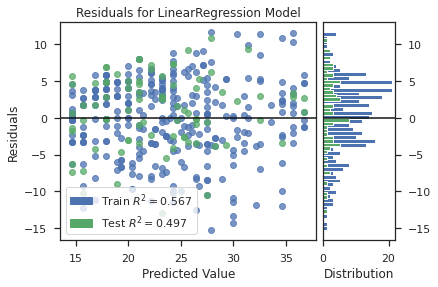

In [22]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
visualizer = ResidualsPlot(reg)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_squared_error(ytest,y_pred)#MSE

24.90603157146337

In [25]:
np.sqrt(metrics.mean_squared_error(ytest,y_pred))#RMSE

4.99059431044674